In [ ]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Connecting Google Drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Breast_Cancer_Mortality_Survival_Dataset.csv')

In [ ]:
print(df.columns)

Index(['Patient ID ', 'Moth of Birth', 'Age', 'Sex', 'Race', 'Marital Status',
       'Occupation Code', 'Adopted Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Mortality_Status'],
      dtype='object')


In [ ]:
# Part A: Breast Cancer Mortality Prediction

# Task 1 - Domain Understanding: Classification
retained_vars = ['Age', 'Sex', 'Race', 'Marital Status', 'T Stage ', 'N Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Mortality_Status']
dropped_vars = ['Patient ID', 'Moth of Birth', 'Occupation Code', 'Adopted Status', '6th Stage', 'Differentiate', 'Survival Months']


               Age        Grade   Tumor Size
count  4015.000000  4024.000000  4021.000000
mean     54.094396     2.150596    30.419299
std      11.417118     0.638234    21.161080
min      30.000000     1.000000   -75.000000
25%      47.000000     2.000000    16.000000
50%      54.000000     2.000000    25.000000
75%      61.000000     3.000000    38.000000
max     502.000000     4.000000   140.000000

Variable Scale Types:
Age: float64
Sex: object
Race: object
Marital Status: object
T Stage : object
N Stage: object
Grade: int64
A Stage: object
Tumor Size: float64
Estrogen Status: object
Progesterone Status: object
Regional Node Examined: object
Reginol Node Positive: object
Mortality_Status: object


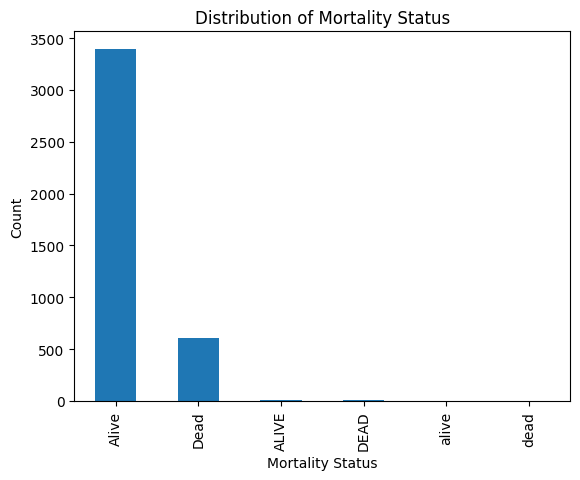

In [ ]:
# Task 2 - Data Understanding: Producing Your Experimental Designing

# Statistical Description
print(df[retained_vars].describe())

# Variable Scale Type
print('\nVariable Scale Types:')
for var in retained_vars:
    print(f'{var}: {df[var].dtype}')

# Target Variable Distribution Plot
df['Mortality_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Mortality Status')
plt.xlabel('Mortality Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Task 3 - Data Preparation: Cleaning and Transforming your data
# Handle missing values
print("Before handling missing values:")
print(df[retained_vars].isnull().sum())

df = df.dropna(subset=retained_vars)

print("\nAfter handling missing values:")
print(df[retained_vars].isnull().sum())

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Sex', 'Race', 'Marital Status', 'T Stage ', 'N Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

print("\nBefore encoding categorical variables:")
print(df[categorical_cols].head())

for col in categorical_cols:
    if col in df.columns:
        df.loc[:, col] = le.fit_transform(df[col])

print("\nAfter encoding categorical variables:")
print(df[categorical_cols].head())

Before handling missing values:
Age                        9
Sex                       77
Race                       0
Marital Status             0
T Stage                    0
N Stage                    0
Grade                      0
A Stage                    0
Tumor Size                 3
Estrogen Status            0
Progesterone Status        0
Regional Node Examined     1
Reginol Node Positive      0
Mortality_Status           4
dtype: int64

After handling missing values:
Age                       0
Sex                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Mortality_Status          0
dtype: int64

Before encoding categorical variables:
      Sex   Race Marital Status T Stage  N Stage  Grade   A Stage  \
0  

In [ ]:
# Task 4 - Modelling: Create Predictive Classification Models
X = df[retained_vars[:-1]]
y = df['Mortality_Status']

# Convert 'One' to 1 in numerical columns if it exists in X
for col in X.select_dtypes(include=['object']).columns:
    # If the string 'One' is present, replace it with 1 and convert the column to numeric
    if 'One' in X[col].unique():
        X.loc[:, col] = pd.to_numeric(X[col].str.replace('One', '1'), errors='coerce')

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Feature names:", X.columns)
print("Data shape:", X.shape)

# Define models
models = {
    'NB': GaussianNB(),
    'LR': LogisticRegression(max_iter=2000, solver='saga', random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

Feature names: Index(['Age', 'Sex', 'Race', 'Marital Status', 'T Stage ', 'N Stage', 'Grade',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive'],
      dtype='object')
Data shape: (3931, 13)



Confusion Matrix for NB:
              Predicted_ALIVE  Predicted_Alive  Predicted_DEAD  \
Actual_ALIVE                1                0               0   
Actual_Alive              448                4              84   
Actual_DEAD                 0                0               0   
Actual_Dead                50                0              31   
Actual_alive                0                0               0   
Actual_dead                 0                0               0   

              Predicted_Dead  Predicted_alive  Predicted_dead  
Actual_ALIVE               0                0               0  
Actual_Alive              22              115               0  
Actual_DEAD                0                0               0  
Actual_Dead               10               18               4  
Actual_alive               0                0               0  
Actual_dead                0                0               0  


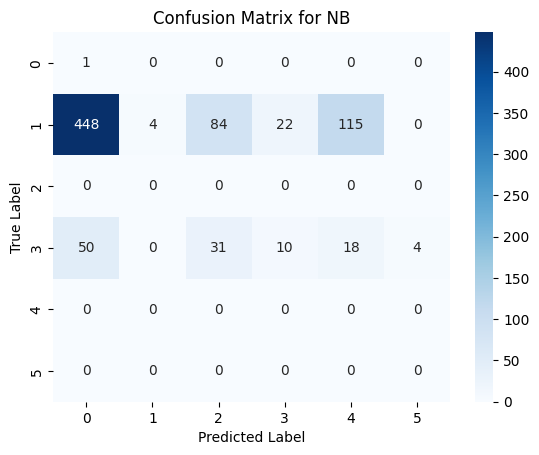

ROC AUC could not be calculated for NB. Error: Number of classes in y_true not equal to the number of columns in 'y_score'
Accuracy: 0.02
Recall: 0.02
Precision: 0.90
F1-score: 0.03
AUC-ROC: N/A

Confusion Matrix for LR:
              Predicted_ALIVE  Predicted_Alive  Predicted_DEAD  \
Actual_ALIVE                1                0               0   
Actual_Alive              188              218             101   
Actual_DEAD                 0                0               0   
Actual_Dead                18               20              21   
Actual_alive                0                0               0   
Actual_dead                 0                0               0   

              Predicted_Dead  Predicted_alive  Predicted_dead  
Actual_ALIVE               0                0               0  
Actual_Alive             130               34               2  
Actual_DEAD                0                0               0  
Actual_Dead               44                4               

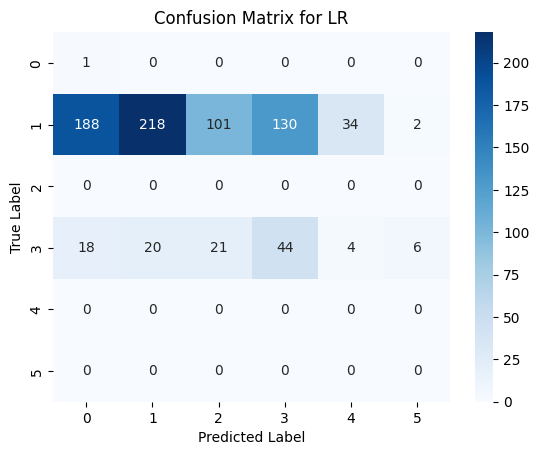

ROC AUC could not be calculated for LR. Error: Number of classes in y_true not equal to the number of columns in 'y_score'
Accuracy: 0.33
Recall: 0.33
Precision: 0.82
F1-score: 0.45
AUC-ROC: N/A

Confusion Matrix for KNN:
              Predicted_ALIVE  Predicted_Alive  Predicted_Dead
Actual_ALIVE                0                1               0
Actual_Alive                0              643              30
Actual_Dead                 0               99              14


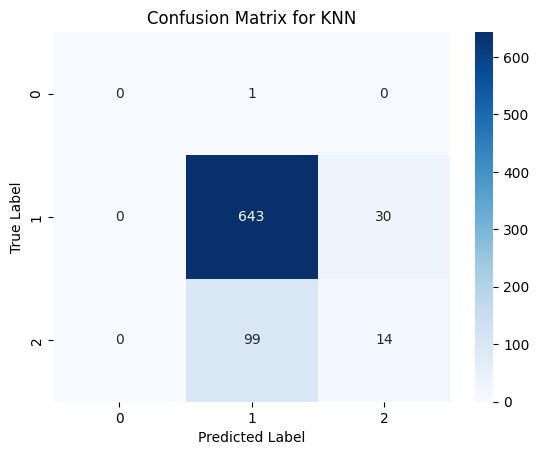

ROC AUC could not be calculated for KNN. Error: Number of classes in y_true not equal to the number of columns in 'y_score'
Accuracy: 0.83
Recall: 0.83
Precision: 0.79
F1-score: 0.80
AUC-ROC: N/A


In [ ]:
# Task 5 - Evaluation: How good are your models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\nConfusion Matrix for {model_name}:')

     # Get unique class labels from y_test and y_pred
    unique_classes = sorted(list(set(y_test) | set(y_pred)))

    # Create confusion matrix DataFrame with correct dimensions
    cm = confusion_matrix(y_test, y_pred, labels=unique_classes)
    cm_df = pd.DataFrame(cm,
                         index=['Actual_' + str(i) for i in unique_classes],
                         columns=['Predicted_' + str(i) for i in unique_classes])
    print(cm_df)

    # (Optional) You can also display the confusion matrix using a heatmap:
    import seaborn as sns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Compute ROC AUC score if probabilities are available
    try:
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')
        else:
            roc_auc = 'N/A'
    except ValueError as e:
        roc_auc = 'N/A'
        print(f"ROC AUC could not be calculated for {model_name}. Error: {e}")

    # Print results
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'AUC-ROC: {roc_auc}')

In [ ]:
# Part B: Breast Cancer Survival Rate Prediction

# Task 1 - Domain Understanding: Regression

X_reg = df[['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']]  # Retained features for regression

# Show dimensions
print("Dimensions of retained data subset:", X_reg.shape)

# List feature names
print("Feature names for regression modeling:", X_reg.columns)

Dimensions of retained data subset: (3931, 7)
Feature names for regression modeling: Index(['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months'],
      dtype='object')


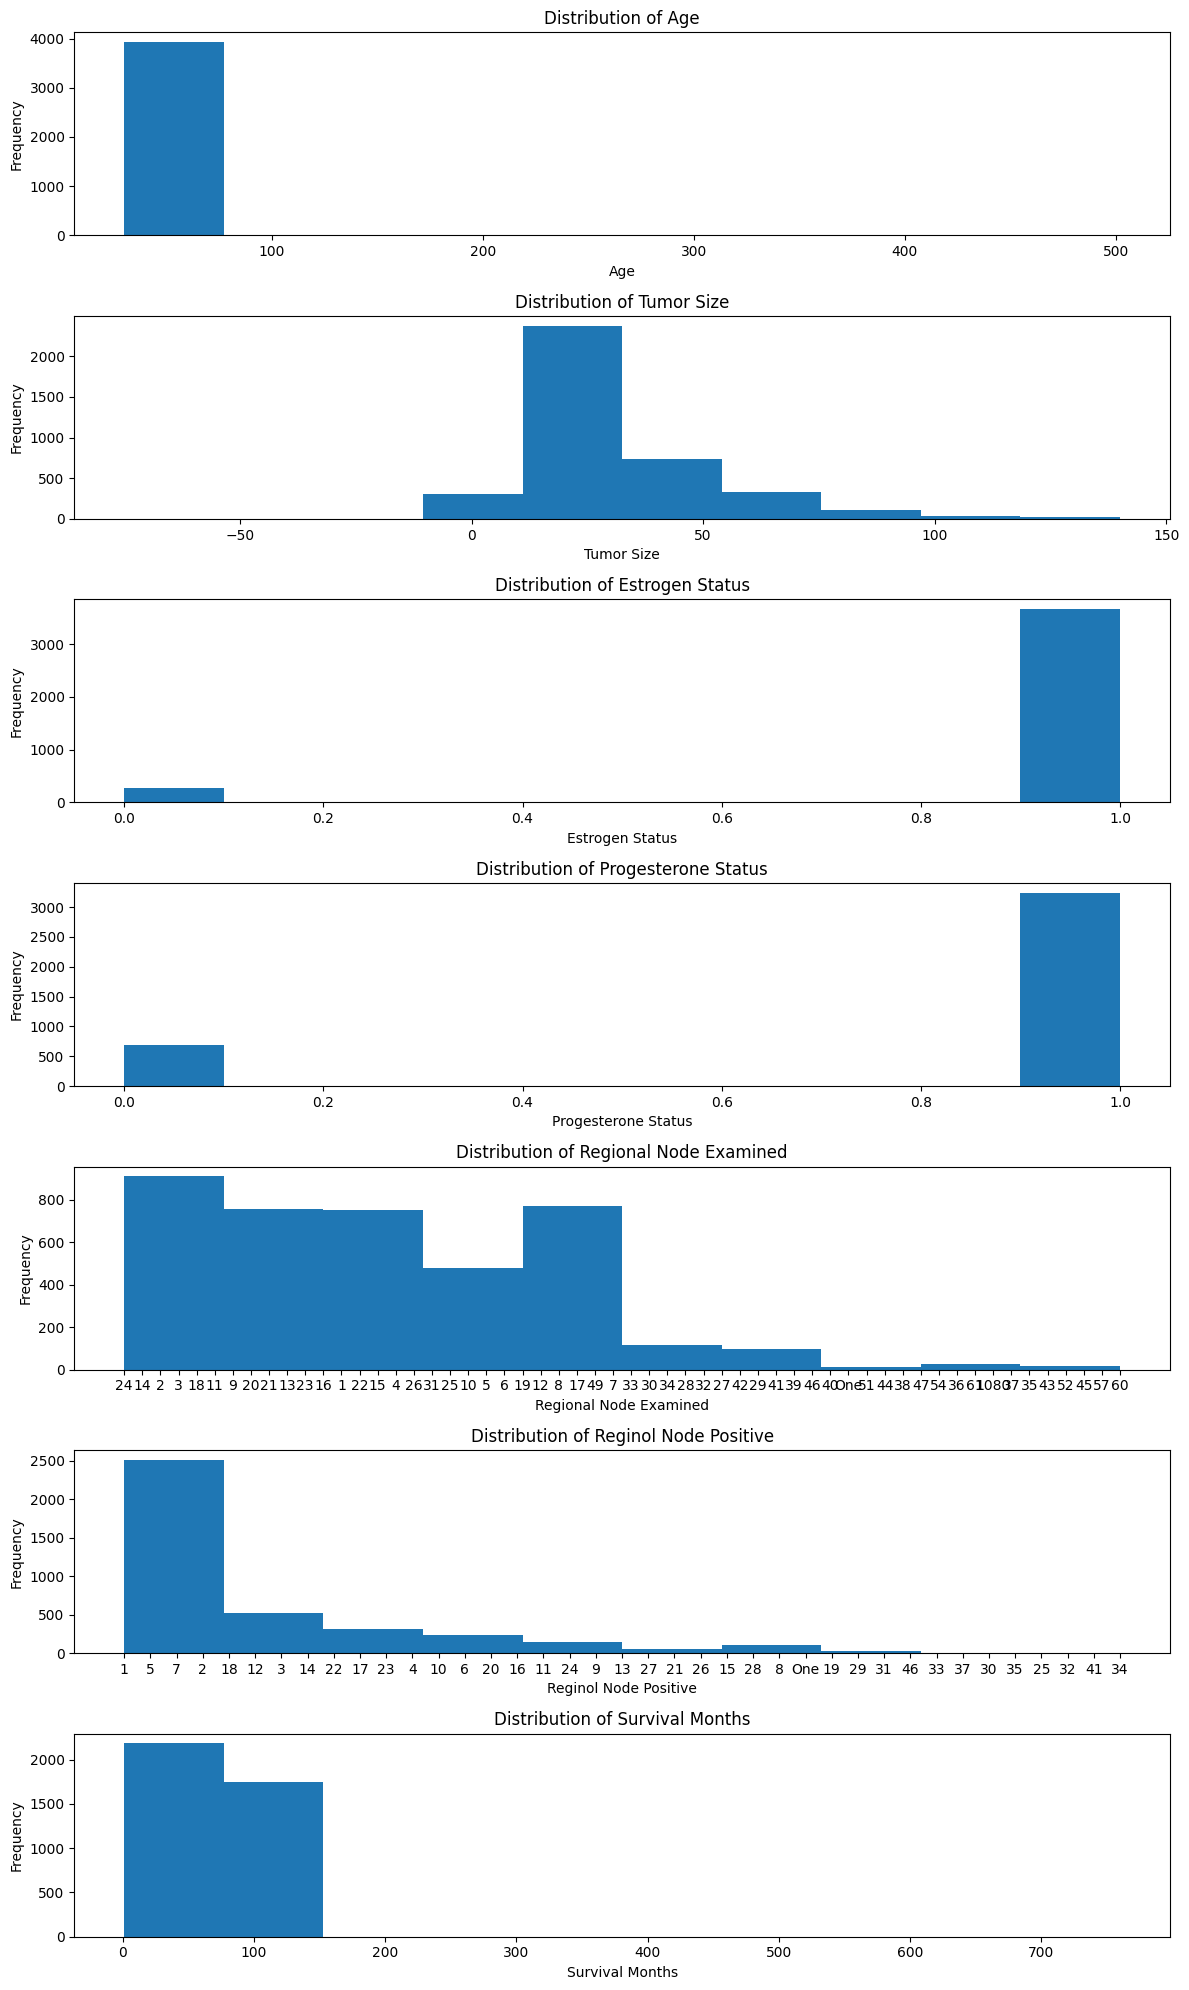

In [ ]:
# Task 2 - Data Understanding: Producing Your Experimental Designing

fig, axes = plt.subplots(len(X_reg.columns), 1, figsize=(12, 20))

for i, col in enumerate(X_reg.columns):
    axes[i].hist(X_reg[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Task 3 - Data Preprocessing: Transforming your data

# Convert 'One' to 1 in numerical columns of X_reg if it exists
for col in X_reg.select_dtypes(include=['object']).columns:
    # If the string 'One' is present, replace it with 1 and convert the column to numeric
    if 'One' in X_reg[col].unique():
        X_reg.loc[:, col] = pd.to_numeric(X_reg[col].str.replace('One', '1'), errors='coerce')
        print(f"Replaced 'One' with 1 and converted column '{col}' to numeric in X_reg.")

print("\nDescriptive Statistics of X_reg:")
print(X_reg.describe())

scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)


Replaced 'One' with 1 and converted column 'Regional Node Examined' to numeric in X_reg.
Replaced 'One' with 1 and converted column 'Reginol Node Positive' to numeric in X_reg.

Descriptive Statistics of X_reg:
               Age   Tumor Size  Survival Months
count  3931.000000  3931.000000      3931.000000
mean     54.112694    30.375731        71.343678
std      11.446046    21.066561        25.429115
min      30.000000   -75.000000         1.000000
25%      47.000000    16.000000        56.000000
50%      54.000000    25.000000        73.000000
75%      61.000000    38.000000        89.000000
max     502.000000   140.000000       760.000000


In [ ]:
# Task 4 - Modelling: Build Predictive Regression Models
le = LabelEncoder()
y_encoded = le.fit_transform(X_reg_scaled[:, -1])

X_reg_scaled_df = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)

X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled_df.drop(columns=['Survival Months']),
                                                    y_encoded, test_size=0.2, random_state=42)

print("\nModel 1 (Numeric features only):")
X_train_numeric = X_train[['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive']]
X_test_numeric = X_test[['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive']]

print("Training subset dimensions:", X_train_numeric.shape)
print("Test subset dimensions:", X_test_numeric.shape)
print("Feature names:", X_train_numeric.columns)

print("\nModel 2 (All retained features):")
print("Training subset dimensions:", X_train.shape)
print("Test subset dimensions:", X_test.shape)
print("Feature names:", X_train.columns)

# Build and train models
dt_reg_numeric = DecisionTreeRegressor().fit(X_train_numeric, y_train)
dt_reg_all = DecisionTreeRegressor().fit(X_train, y_train)



Model 1 (Numeric features only):
Training subset dimensions: (3144, 6)
Test subset dimensions: (787, 6)
Feature names: Index(['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive'],
      dtype='object')

Model 2 (All retained features):
Training subset dimensions: (3144, 6)
Test subset dimensions: (787, 6)
Feature names: Index(['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive'],
      dtype='object')


In [ ]:
# Task 5 - Evaluation: How good are your models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_test_all = X_test[X_train.columns]

y_pred_numeric = dt_reg_numeric.predict(X_test_numeric)
y_pred_all = dt_reg_all.predict(X_test_all)

mse_numeric = mean_squared_error(y_test, y_pred_numeric)
mse_all = mean_squared_error(y_test, y_pred_all)
mae_numeric = mean_absolute_error(y_test, y_pred_numeric)
mae_all = mean_absolute_error(y_test, y_pred_all)
r2_numeric = r2_score(y_test, y_pred_numeric)
r2_all = r2_score(y_test, y_pred_all)

print(f'Numeric Features Only:')
print(f'MSE: {mse_numeric:.2f}')
print(f'MAE: {mae_numeric:.2f}')
print(f'R-Square: {r2_numeric:.2f}')

print(f'All Features:')
print(f'MSE: {mse_all:.2f}')
print(f'MAE: {mae_all:.2f}')
print(f'R-Square: {r2_all:.2f}')

Numeric Features Only:
MSE: 1035.61
MAE: 25.40
R-Square: -1.00
All Features:
MSE: 1087.15
MAE: 26.20
R-Square: -1.10


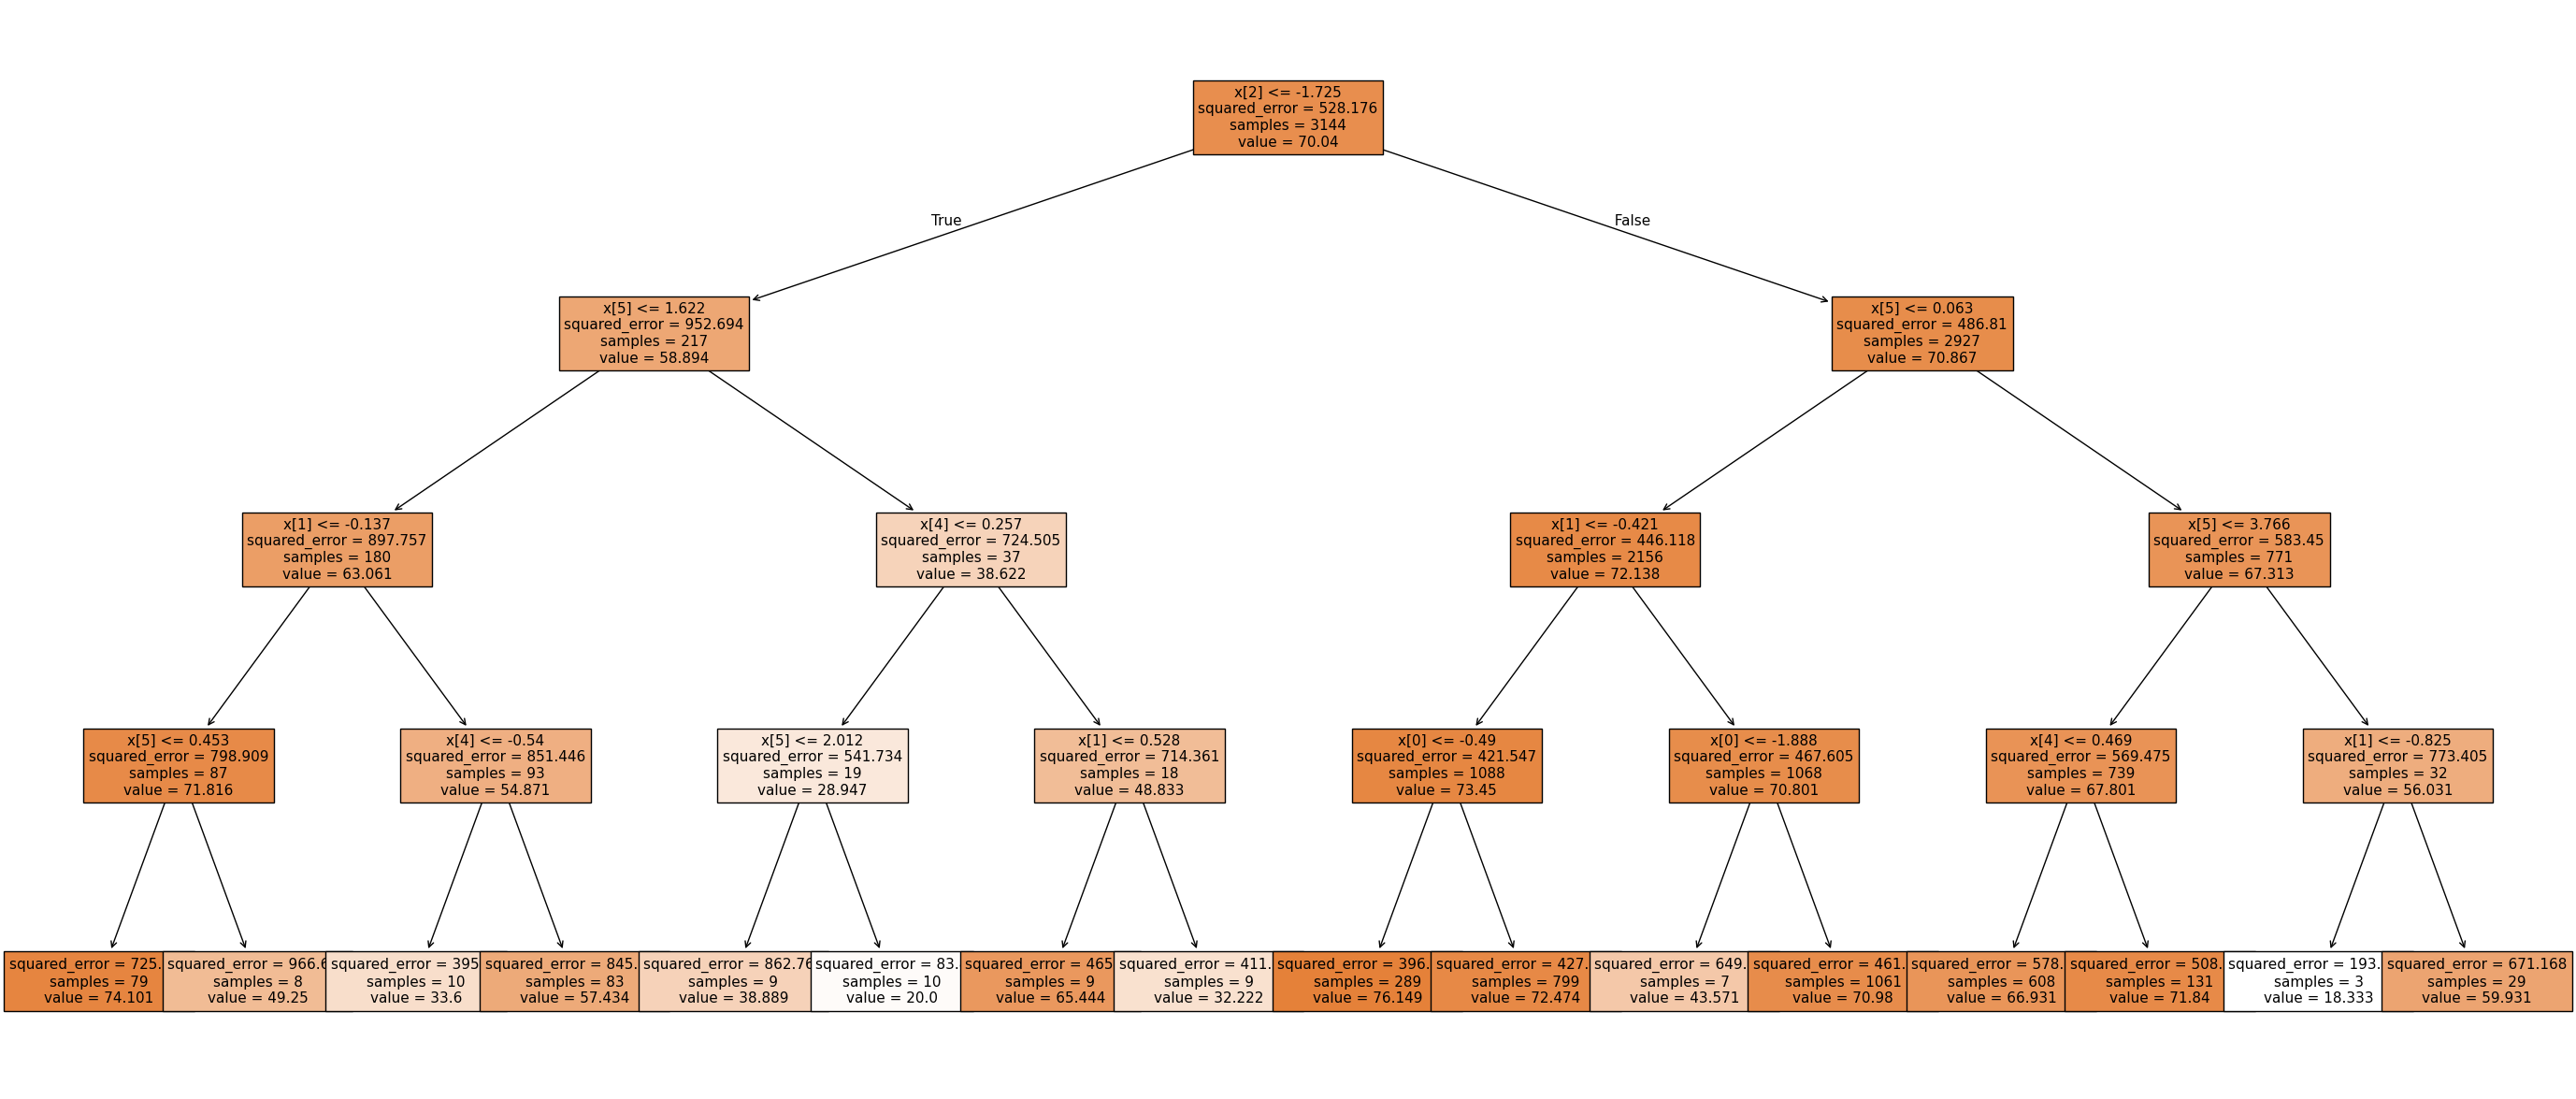


Pruned Model 1 (Numeric features only):
R-squared: 0.0283
Adjusted R-squared: 0.0209


In [ ]:
# Model 1 (Numeric features only) with pre-pruning
dt_reg_pruned = DecisionTreeRegressor(max_depth=4)  # Limit depth to 4 levels

# Assume you want to use the numeric features for training
X_train_reg = X_train_numeric
y_train_reg = y_train

# Assume you want to use the same features for testing as training
X_test_reg = X_test_numeric
y_test_reg = y_test

dt_reg_pruned.fit(X_train_reg, y_train_reg)  # Using X_train_reg and y_train_reg

# Plot the pruned tree
from sklearn.tree import plot_tree # Make sure to import plot_tree
plt.figure(figsize=(35, 15))
plot_tree(dt_reg_pruned, filled=True, fontsize=11)  # Using the provided plotting code
plt.show()

# Evaluate the pruned model
y_pred_pruned = dt_reg_pruned.predict(X_test_reg)  # Assuming X_test_reg is available for prediction
r2_pruned = r2_score(y_test_reg, y_pred_pruned)  # Using y_test_reg for evaluation
adj_r2_pruned = 1 - (1 - r2_pruned) * (len(y_test_reg) - 1) / (len(y_test_reg) - X_test_reg.shape[1] - 1)
# ... (other evaluation metrics if needed) ...

print("\nPruned Model 1 (Numeric features only):")
print(f"R-squared: {r2_pruned:.4f}")
print(f"Adjusted R-squared: {adj_r2_pruned:.4f}")

In [ ]:
# create a new scaler based on X_train_numeric
scaler_numeric = StandardScaler()
scaler_numeric.fit(X_train_numeric)

# Predicting for patient B002565
patient_data = [[56, 41, 1, 1, 5, 1]]
patient_df = pd.DataFrame(patient_data, columns=['Age', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive'])  # Create DataFrame with feature names

# Scale the patient data using the scaler_numeric
patient_data_scaled = scaler_numeric.transform(patient_df)

# Create DataFrame for the scaled patient data
patient_data_scaled_df = pd.DataFrame(patient_data_scaled, columns=X_train_numeric.columns)

predicted_survival_months = dt_reg_numeric.predict(patient_data_scaled_df)

print(f"Predicted Survival Months for Patient B002565: {predicted_survival_months[0]:.2f}")

Predicted Survival Months for Patient B002565: 101.00
